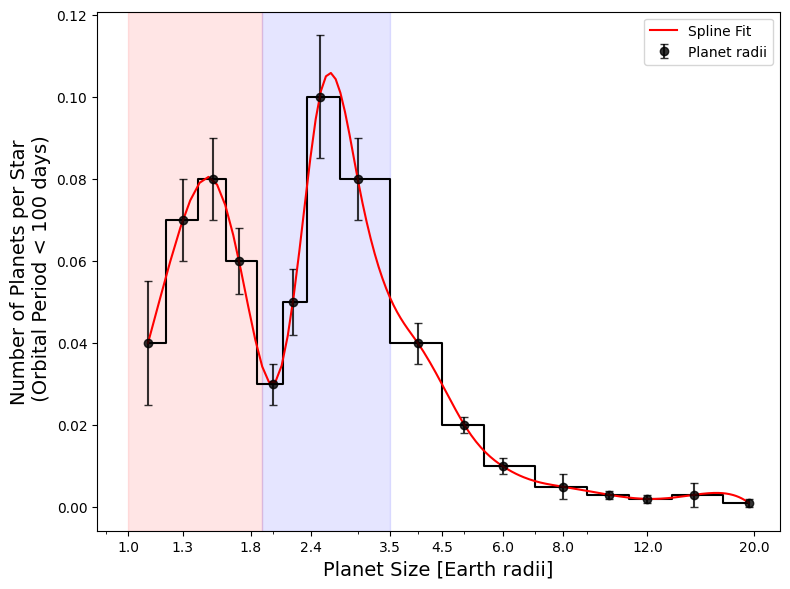

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Data for the black curve
x_black = np.array([1.1, 1.3, 1.5, 1.7, 2.0, 2.2, 2.5, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 15.0, 19.5])
y_black = np.array([0.04, 0.07, 0.08, 0.06, 0.03, 0.05, 0.10, 0.08, 0.04, 0.02, 0.01, 0.005, 0.003, 0.002, 0.003, 0.001])
y_err_black = np.array([0.015, 0.01, 0.01, 0.008, 0.005, 0.008, 0.015, 0.01, 0.005, 0.002, 0.002, 0.003, 0.001, 0.001, 0.003, 0.001])

# Interpolating the red curve as a spline fit to the black curve
x_spline = np.linspace(min(x_black), max(x_black), 300)
spline = make_interp_spline(x_black, y_black)
y_spline = spline(x_spline)

# Plotting the figure
plt.figure(figsize=(8, 6))

# Plot black curve with error bars
plt.errorbar(x_black, y_black, yerr=y_err_black, fmt='o', color='black', label='Planet radii', capsize=3, alpha=0.8)

plt.step(x_black, y_black, where='mid', color='black', linestyle='-')

# Plot red spline curve
plt.plot(x_spline, y_spline, color='red', label='Spline Fit', linestyle='-')

# Highlighting regions for bimodal radius distribution
plt.axvspan(1.0, 1.9, color='red', alpha=0.1)
plt.axvspan(1.9, 3.5, color='blue', alpha=0.1)

# Customize axes
plt.xscale('log')
plt.xlabel('Planet Size [Earth radii]', fontsize=14)
plt.ylabel(f'Number of Planets per Star\n (Orbital Period < 100 days)', fontsize=14)
#plt.title('Simplified Fulton (2017) Radius Gap', fontsize=16)
plt.legend()
xticks = [1.0, 1.3, 1.8, 2.4, 3.5, 4.5, 6.0, 8.0, 12.0, 20.0]
plt.xticks(xticks, labels=[f'{tick}' for tick in xticks])
plt.tight_layout()

# Display the plot
plt.show()


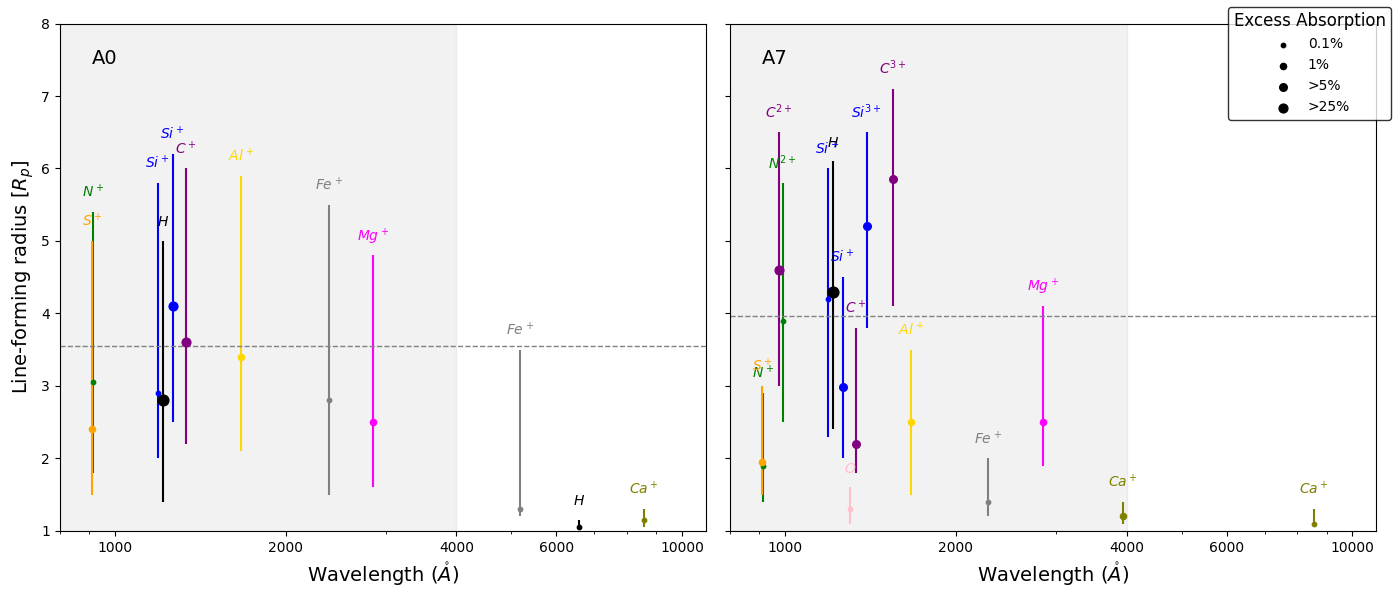

In [102]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np

# Updated data for line-forming radii and excess absorption for A0 and A7 host stars
spectral_lines_A0 = {
    'N': {'lam': 916.7, 'y_start': 1.8, 'y_end': 5.4, 'dot_pos': 3.05, 'dot_size': 10, 'color': 'green', 'name':r'$N^+$'},
    'S': {'lam': 912.7, 'y_start': 1.5, 'y_end': 5, 'dot_pos': 2.4, 'dot_size': 20, 'color': 'orange', 'name':r'$S^+$'},
    'H': {'lam': 1215.7, 'y_start': 1.4, 'y_end': 5, 'dot_pos': 2.8, 'dot_size': 60, 'color': 'black', 'name':r'$H$'},
    'Si': {'lam': 1190, 'y_start': 2, 'y_end': 5.8, 'dot_pos': 2.9, 'dot_size': 10, 'color': 'blue', 'name':r'$Si^+$'},
    'Si2': {'lam': 1264.7, 'y_start': 2.5, 'y_end': 6.2, 'dot_pos': 4.1, 'dot_size': 40, 'color': 'blue', 'name':r'$Si^+$'},
    'C': {'lam': 1335.7, 'y_start': 2.2, 'y_end': 6, 'dot_pos': 3.6, 'dot_size': 40, 'color': 'purple', 'name':r'$C^+$'},
    'Al': {'lam': 1670.8, 'y_start': 2.1, 'y_end': 5.9, 'dot_pos': 3.4, 'dot_size': 20, 'color': 'gold', 'name':r'$Al^+$'},
    'Fe': {'lam': 2382.8, 'y_start': 1.5, 'y_end': 5.5, 'dot_pos': 2.8, 'dot_size': 10, 'color': 'gray', 'name':r'$Fe^+$'},
    'Mg': {'lam': 2853, 'y_start': 1.6, 'y_end': 4.8, 'dot_pos': 2.5, 'dot_size': 20, 'color': 'magenta', 'name':r'$Mg^+$'},
    'Fe2': {'lam': 5170, 'y_start': 1.2, 'y_end': 3.5, 'dot_pos': 1.3, 'dot_size': 10, 'color': 'gray', 'name':r'$Fe^+$'},
    'H2': {'lam': 6564.5, 'y_start': 1.05, 'y_end': 1.15, 'dot_pos': 1.055, 'dot_size': 10, 'color': 'black', 'name':r'$H$'},
    'Ca': {'lam': 8544.4, 'y_start': 1.05, 'y_end': 1.3, 'dot_pos': 1.15, 'dot_size': 10, 'color': 'olive', 'name':r'$Ca^+$'}
}

spectral_lines_A7 = {
    'N': {'lam': 916.7, 'y_start': 1.4, 'y_end': 2.9, 'dot_pos': 1.9, 'dot_size': 10, 'color': 'green', 'name':r'$N^+$'},
    'S': {'lam': 912.7, 'y_start': 1.5, 'y_end': 3, 'dot_pos': 1.95, 'dot_size': 20, 'color': 'orange', 'name':r'$S^+$'},
    'C2': {'lam': 977, 'y_start': 3, 'y_end': 6.5, 'dot_pos': 4.6, 'dot_size': 40, 'color': 'purple', 'name':r'$C^{2+}$'},
    'N2': {'lam': 991.6, 'y_start': 2.5, 'y_end': 5.8, 'dot_pos': 3.9, 'dot_size': 10, 'color': 'green', 'name':r'$N^{2+}$'},
    'H': {'lam': 1215.7, 'y_start': 2.4, 'y_end': 6.1, 'dot_pos': 4.3, 'dot_size': 60, 'color': 'black', 'name':r'$H$'},
    'Si': {'lam': 1190, 'y_start': 2.3, 'y_end': 6.0, 'dot_pos': 4.2, 'dot_size': 10, 'color': 'blue', 'name':r'$Si^+$'},
    'Si2': {'lam': 1264.7, 'y_start': 2.0, 'y_end': 4.5, 'dot_pos': 2.99, 'dot_size': 30, 'color': 'blue', 'name':r'$Si^+$'},
    'O': {'lam': 1302.2, 'y_start': 1.1, 'y_end': 1.6, 'dot_pos': 1.3, 'dot_size': 10, 'color': 'pink', 'name':r'$O$'},
    'C': {'lam': 1335.7, 'y_start': 1.8, 'y_end': 3.8, 'dot_pos': 2.2, 'dot_size': 30, 'color': 'purple', 'name':r'$C^+$'},
    'Si3': {'lam': 1393.8, 'y_start': 3.8, 'y_end': 6.5, 'dot_pos': 5.2, 'dot_size': 30, 'color': 'blue', 'name':r'$Si^{3+}$'},
    'C3': {'lam': 1548.2, 'y_start': 4.1, 'y_end': 7.1, 'dot_pos': 5.85, 'dot_size': 30, 'color': 'purple', 'name':r'$C^{3+}$'},
    'Al': {'lam': 1670.8, 'y_start': 1.5, 'y_end': 3.5, 'dot_pos': 2.5, 'dot_size': 20, 'color': 'gold', 'name':r'$Al^+$'},
    'Fe': {'lam': 2282.8, 'y_start': 1.2, 'y_end': 2.0, 'dot_pos': 1.4, 'dot_size': 10, 'color': 'gray', 'name':r'$Fe^+$'},
    'Mg': {'lam': 2853, 'y_start': 1.9, 'y_end': 4.1, 'dot_pos': 2.5, 'dot_size': 20, 'color': 'magenta', 'name':r'$Mg^+$'},
    'Ca2': {'lam': 3934.8, 'y_start': 1.1, 'y_end': 1.4, 'dot_pos': 1.2, 'dot_size': 20, 'color': 'olive', 'name':r'$Ca^+$'},
    'Ca': {'lam': 8544.4, 'y_start': 1.05, 'y_end': 1.3, 'dot_pos': 1.1, 'dot_size': 10, 'color': 'olive', 'name':r'$Ca^+$'}
}  

# Plotting the panels
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Customize x-axis ticks
xticks = [1000, 2000, 4000, 6000, 10000]

# Function to plot spectral lines
def plot_spectral_lines(ax, lines, host_type, hillR = None):
    ax.set_xscale('log')
    ax.set_xticks(xticks)
    ax.set_xticklabels([str(tick) for tick in xticks]) 
    for element, line in lines.items():
        # Plot the vertical line
        ax.vlines(x=line['lam'], ymin=line['y_start'], ymax=line['y_end'], color=line['color'], linestyle='-', linewidth=1.5)
        # Plot the dot
        ax.scatter(line['lam'], [line['dot_pos']], s=line['dot_size'], color=line['color'], zorder=5)
        # Add annotation
        ax.text(line['lam'], line['y_end'] + 0.2, line['name'], color=line['color'], fontsize=10, ha='center', zorder=10)
    ax.text(0.05, 0.95, host_type, transform=ax.transAxes, fontsize=14, verticalalignment='top', horizontalalignment='left') #, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    ax.set_xlabel(r"Wavelength ($\mathring{A}$)", fontsize=14)
    ax.set_xlim(800, 11000)
    ax.set_ylim(1, 8)
    ax.axvspan(800, 4000, color='gray', alpha=0.1)
    if hillR:
        ax.axhline(hillR, color='gray', linestyle='--', linewidth=1)
    #ax.grid(True, linestyle='--', alpha=0.6)

# Panel for A0 star
plot_spectral_lines(axes[0], spectral_lines_A0, 'A0', hillR=3.55)
axes[0].set_ylabel(r"Line-forming radius [$R_p$]", fontsize=14)

# Panel for A7 star
plot_spectral_lines(axes[1], spectral_lines_A7, 'A7', hillR=3.96)

# Add legend for dot sizes
fig.legend(
    [plt.scatter([], [], s=size, color='black') for size in [10, 20, 30, 40]],
    ['0.1%', '1%', '>5%', '>25%'],
    loc='upper right', title='Excess Absorption', fontsize=10, title_fontsize=12, frameon=True, edgecolor='black'
)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
